In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FuncFormatter

## Data set

In [2]:
training_set1 = pd.read_csv('https://raw.githubusercontent.com/BettySanchez7/AirDataMx/main/datos/promedios_mensuales/SO2_mensual.csv')

## Dataloading

In [3]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)


    return np.array(x),np.array(y)



## Model

In [4]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

BLUE: DATA TEST
ORANGE: DATA PREDICTION

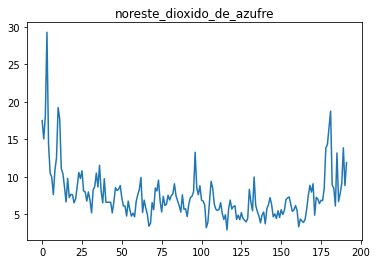

Epoch: 0, loss: 0.09985
Epoch: 100, loss: 0.00831
Epoch: 200, loss: 0.00588
Epoch: 300, loss: 0.00501
Epoch: 400, loss: 0.00462
Epoch: 500, loss: 0.00447
Epoch: 600, loss: 0.00443
Epoch: 700, loss: 0.00441
Epoch: 800, loss: 0.00441
Epoch: 900, loss: 0.00440
Epoch: 1000, loss: 0.00440
Epoch: 1100, loss: 0.00439
Epoch: 1200, loss: 0.00439
Epoch: 1300, loss: 0.00438
Epoch: 1400, loss: 0.00438
Epoch: 1500, loss: 0.00437
Epoch: 1600, loss: 0.00437
Epoch: 1700, loss: 0.00436
Epoch: 1800, loss: 0.00435
Epoch: 1900, loss: 0.00434


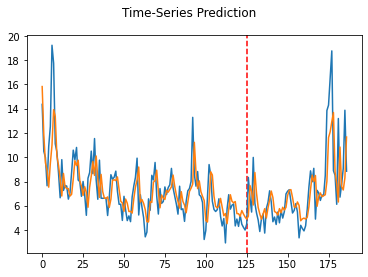

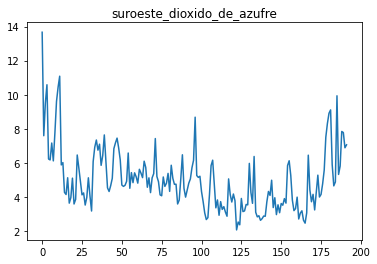

Epoch: 0, loss: 0.05362
Epoch: 100, loss: 0.01626
Epoch: 200, loss: 0.00916
Epoch: 300, loss: 0.00873
Epoch: 400, loss: 0.00872
Epoch: 500, loss: 0.00871
Epoch: 600, loss: 0.00870
Epoch: 700, loss: 0.00868
Epoch: 800, loss: 0.00867
Epoch: 900, loss: 0.00865
Epoch: 1000, loss: 0.00863
Epoch: 1100, loss: 0.00862
Epoch: 1200, loss: 0.00860
Epoch: 1300, loss: 0.00859
Epoch: 1400, loss: 0.00858
Epoch: 1500, loss: 0.00857
Epoch: 1600, loss: 0.00856
Epoch: 1700, loss: 0.00855
Epoch: 1800, loss: 0.00852
Epoch: 1900, loss: 0.00848


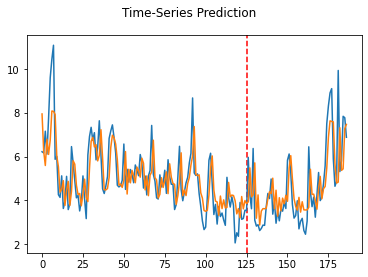

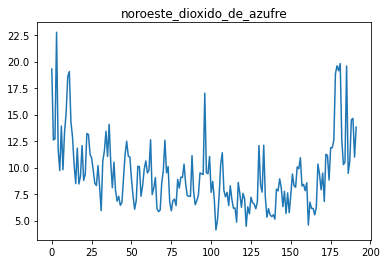

Epoch: 0, loss: 0.71181
Epoch: 100, loss: 0.02012
Epoch: 200, loss: 0.01838
Epoch: 300, loss: 0.01505
Epoch: 400, loss: 0.01305
Epoch: 500, loss: 0.01255
Epoch: 600, loss: 0.01240
Epoch: 700, loss: 0.01234
Epoch: 800, loss: 0.01230
Epoch: 900, loss: 0.01227
Epoch: 1000, loss: 0.01224
Epoch: 1100, loss: 0.01220
Epoch: 1200, loss: 0.01216
Epoch: 1300, loss: 0.01212
Epoch: 1400, loss: 0.01207
Epoch: 1500, loss: 0.01201
Epoch: 1600, loss: 0.01194
Epoch: 1700, loss: 0.01184
Epoch: 1800, loss: 0.01164
Epoch: 1900, loss: 0.01108


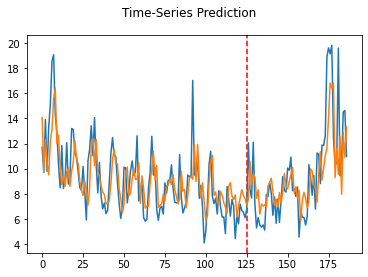

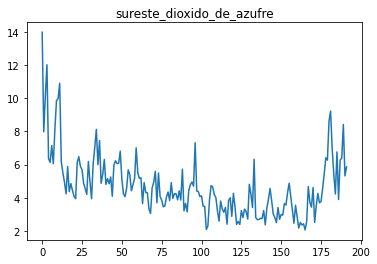

Epoch: 0, loss: 0.10719
Epoch: 100, loss: 0.00990
Epoch: 200, loss: 0.00793
Epoch: 300, loss: 0.00769
Epoch: 400, loss: 0.00767
Epoch: 500, loss: 0.00765
Epoch: 600, loss: 0.00763
Epoch: 700, loss: 0.00759
Epoch: 800, loss: 0.00755
Epoch: 900, loss: 0.00745
Epoch: 1000, loss: 0.00716
Epoch: 1100, loss: 0.00675
Epoch: 1200, loss: 0.00619
Epoch: 1300, loss: 0.00574
Epoch: 1400, loss: 0.00561
Epoch: 1500, loss: 0.00552
Epoch: 1600, loss: 0.00545
Epoch: 1700, loss: 0.00540
Epoch: 1800, loss: 0.00536
Epoch: 1900, loss: 0.00533


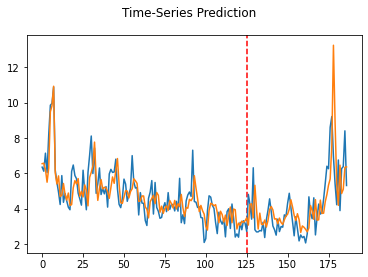

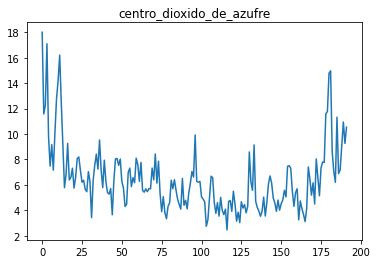

Epoch: 0, loss: 0.09245
Epoch: 100, loss: 0.00899
Epoch: 200, loss: 0.00870
Epoch: 300, loss: 0.00866
Epoch: 400, loss: 0.00863
Epoch: 500, loss: 0.00861
Epoch: 600, loss: 0.00859
Epoch: 700, loss: 0.00857
Epoch: 800, loss: 0.00854
Epoch: 900, loss: 0.00852
Epoch: 1000, loss: 0.00850
Epoch: 1100, loss: 0.00847
Epoch: 1200, loss: 0.00844
Epoch: 1300, loss: 0.00836
Epoch: 1400, loss: 0.00808
Epoch: 1500, loss: 0.00759
Epoch: 1600, loss: 0.00724
Epoch: 1700, loss: 0.00697
Epoch: 1800, loss: 0.00681
Epoch: 1900, loss: 0.00669


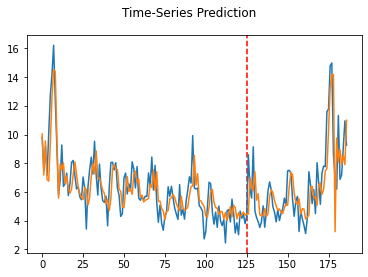

In [5]:

for i in range (1,6):
    training_set = training_set1.iloc[:,i:i+1].values
#Data Plot
    plt.plot(training_set, label = 'CO - Monoxido de carbono')
    plt.title(training_set1.columns[i])
    plt.show()
#training
    sc = MinMaxScaler()
    training_data = sc.fit_transform(training_set)

    seq_length = 4
    x, y = sliding_windows(training_data, seq_length)

    train_size = int(len(y) * 0.67)
    test_size = len(y) - train_size

    dataX = Variable(torch.Tensor(np.array(x)))
    dataY = Variable(torch.Tensor(np.array(y)))

    trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
    trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

    testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
    testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))
    num_epochs = 2000
    learning_rate = 0.01

    input_size = 1
    hidden_size = 2
    num_layers = 1

    num_classes = 1

    lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

    criterion = torch.nn.MSELoss()    # mean-squared error for regression
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

    # Train the model

    for epoch in range(num_epochs):
        outputs = lstm(trainX)
        optimizer.zero_grad()
        
        # obtain the loss function
        loss = criterion(outputs, trainY)
        
        loss.backward()
        
        optimizer.step()
        if epoch % 100 == 0:
            print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

#testing
    lstm.eval()
    train_predict = lstm(dataX)

    data_predict = train_predict.data.numpy()
    dataY_plot = dataY.data.numpy()

    data_predict = sc.inverse_transform(data_predict)
    dataY_plot = sc.inverse_transform(dataY_plot)

    plt.axvline(x=train_size, c='r', linestyle='--')

    plt.plot(dataY_plot)
    plt.plot(data_predict)
    plt.suptitle('Time-Series Prediction')
    plt.show()